## Importing Libraries

In [31]:
import pandas as pd 
import datetime
import numpy as np 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Iris Dataset

In [3]:
iris_data = pd.read_csv('iris_data.csv')

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter Plot

In [5]:
# To set fig size for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

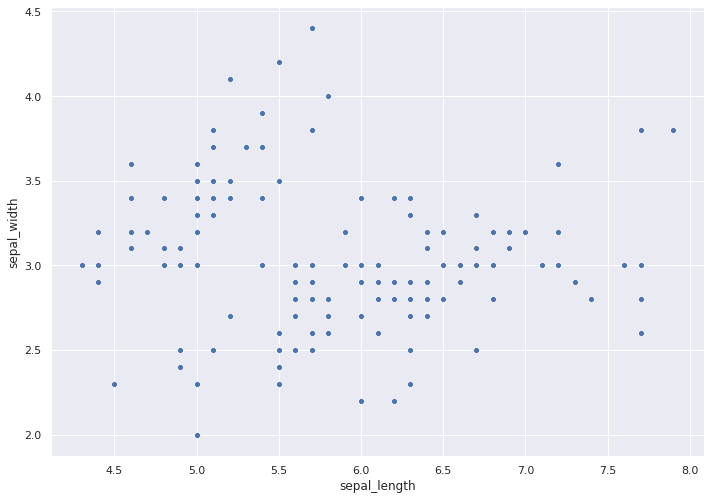

In [6]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_data);

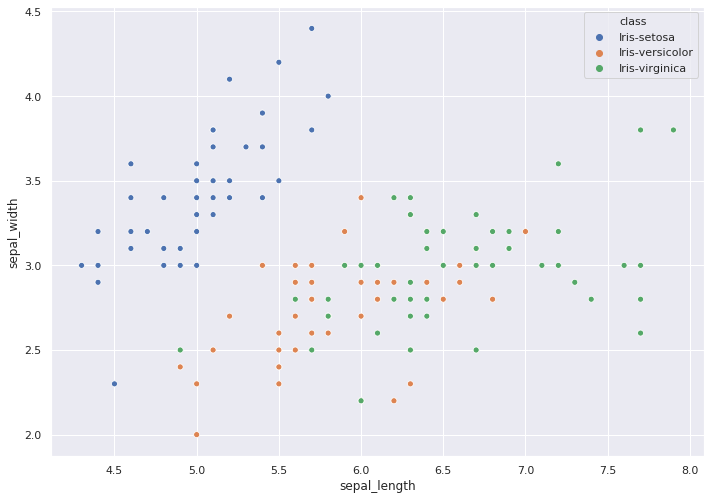

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris_data);

## Line Plot

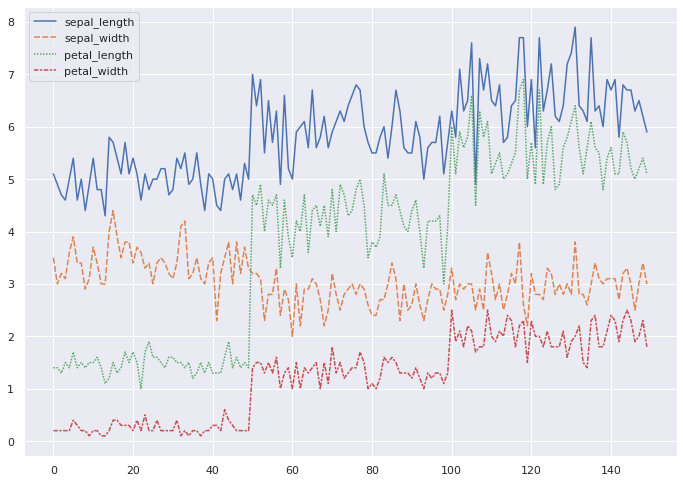

In [8]:
sns.lineplot(data=iris_data.drop(['class'], axis=1));

## Histogram Plot

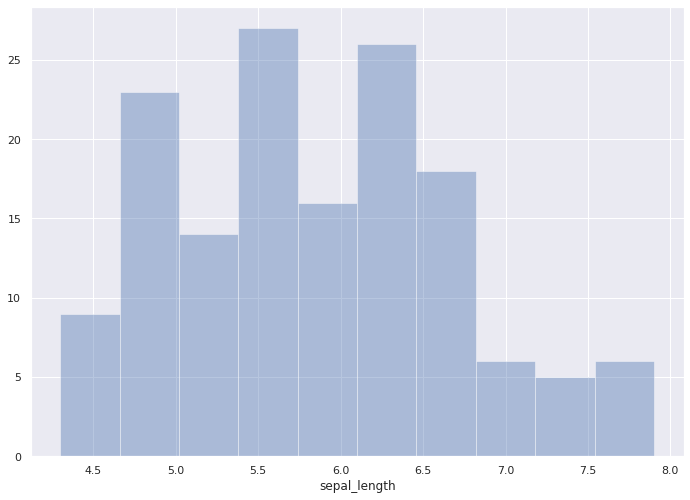

In [9]:
# Putting kde parameter to False, does not plot distribution plot of the series
sns.distplot(iris_data['sepal_length'], bins=10, kde=False);

## Plotting Histogram Plot with Distribution Plot

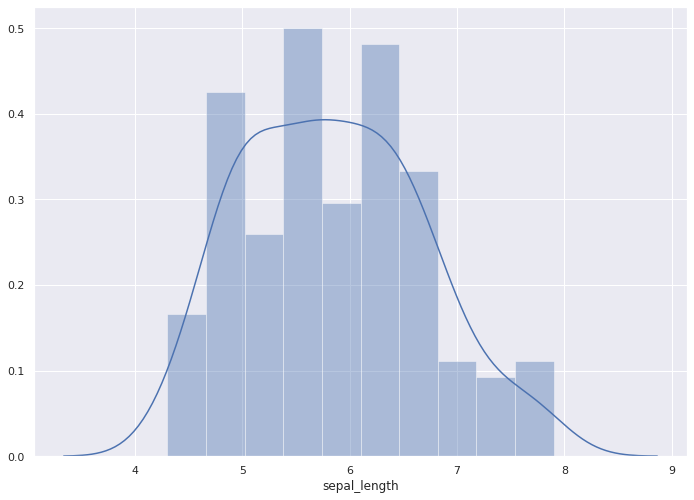

In [10]:
# Put kde=True, for plotting histogram plot with distribution plot
sns.distplot(iris_data['sepal_length'], bins=10, kde=True);

## Bar Chart

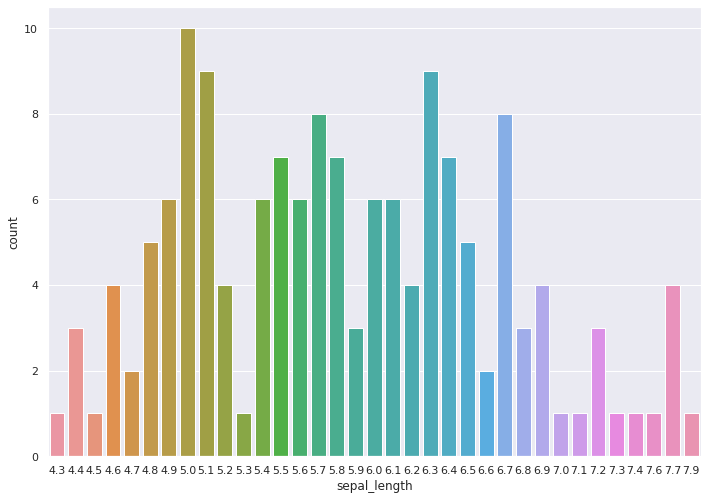

In [11]:
sns.countplot(iris_data['sepal_length']);

## Box Plot

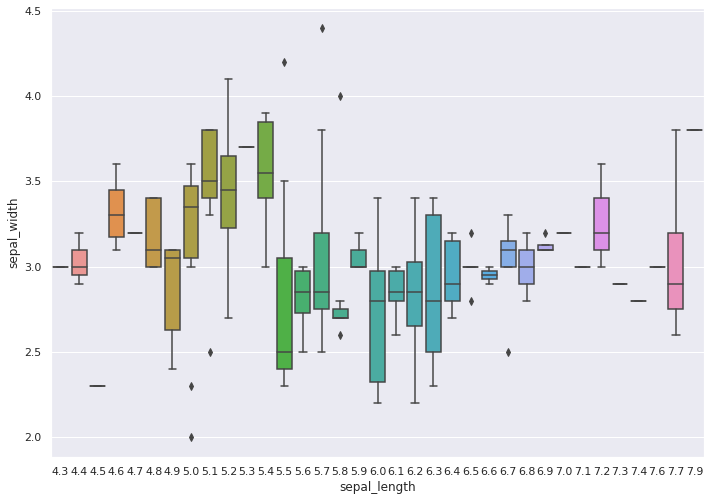

In [12]:
sns.boxplot('sepal_length', 'sepal_width', data=iris_data);

## HeatMap

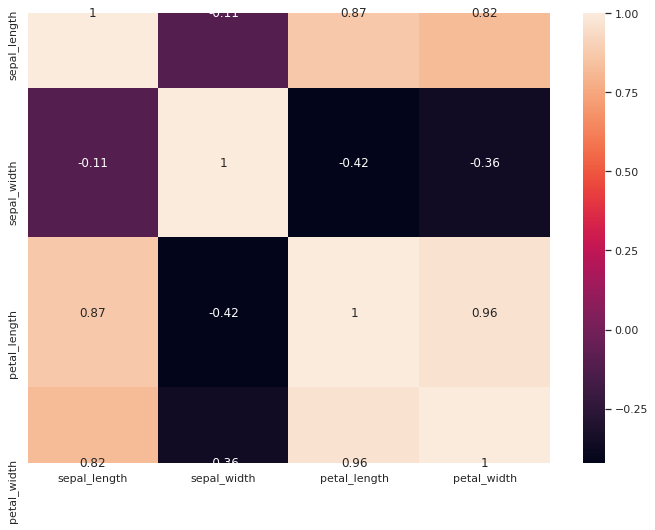

In [13]:
sns.heatmap(iris_data.corr(), annot=True)

## Faceting

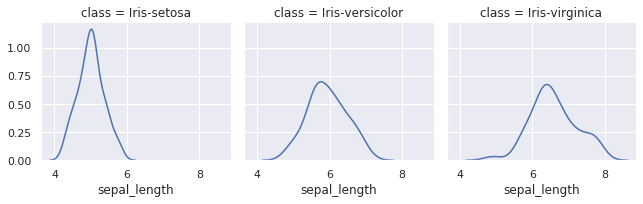

In [14]:
# Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.
# Faceting is really helpful if you want to quickly explore your dataset
g = sns.FacetGrid(iris_data, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

## Pair Plot

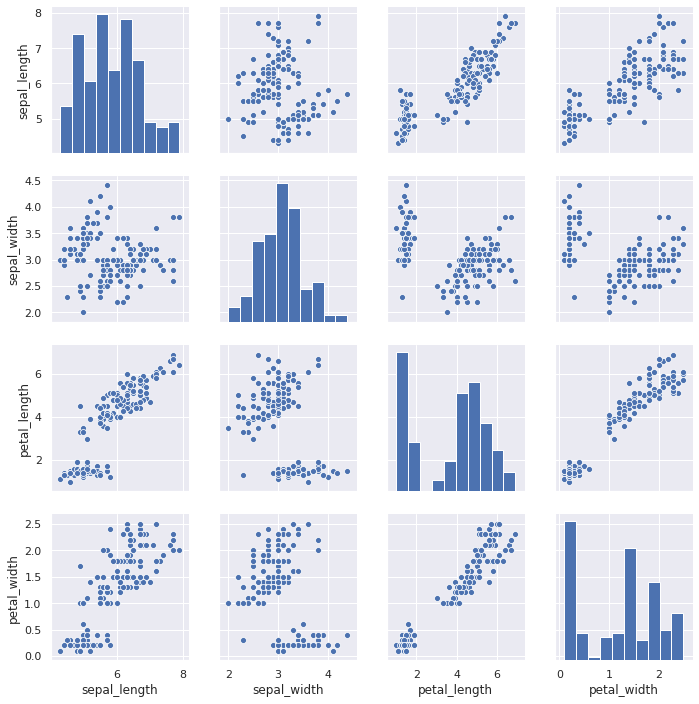

In [15]:
sns.pairplot(iris_data);

## Seaborn Plots

#### Histogram, KDE and Densities

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


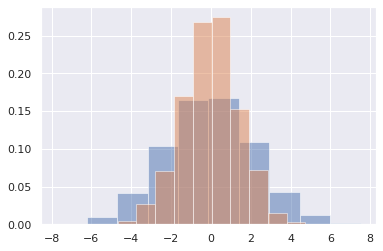

In [18]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

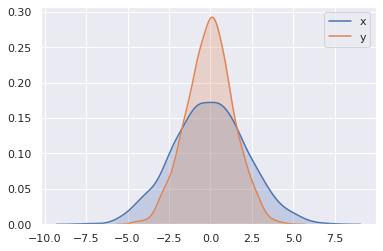

In [19]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histogram and KDE can be combined using Distplot

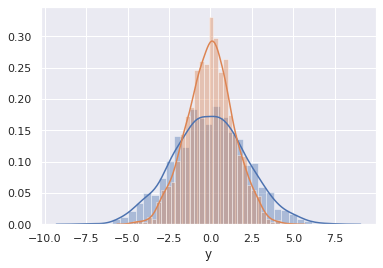

In [20]:
sns.distplot(data['x'])
sns.distplot(data['y']);

2-D Data Visualization

/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


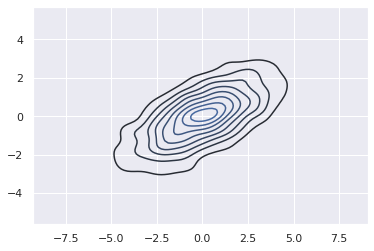

In [21]:
sns.kdeplot(data)

Joint Distribution and Marginal Distribution using jointplot in seaborn

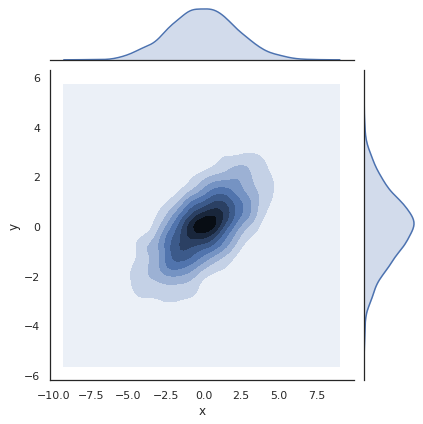

In [22]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="kde")

Hexagonally based Histogram

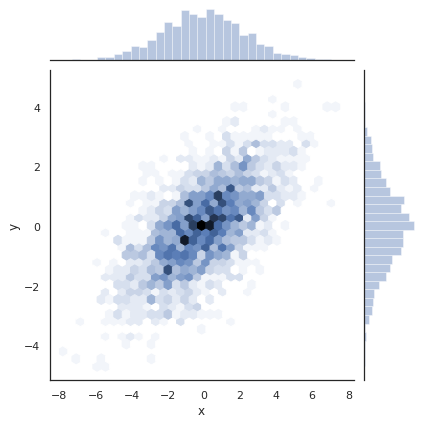

In [23]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="hex")

## Pair Plot

It is useful for exploring correlation between multidimensional data where you plot all pairs of values against each other

In [25]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


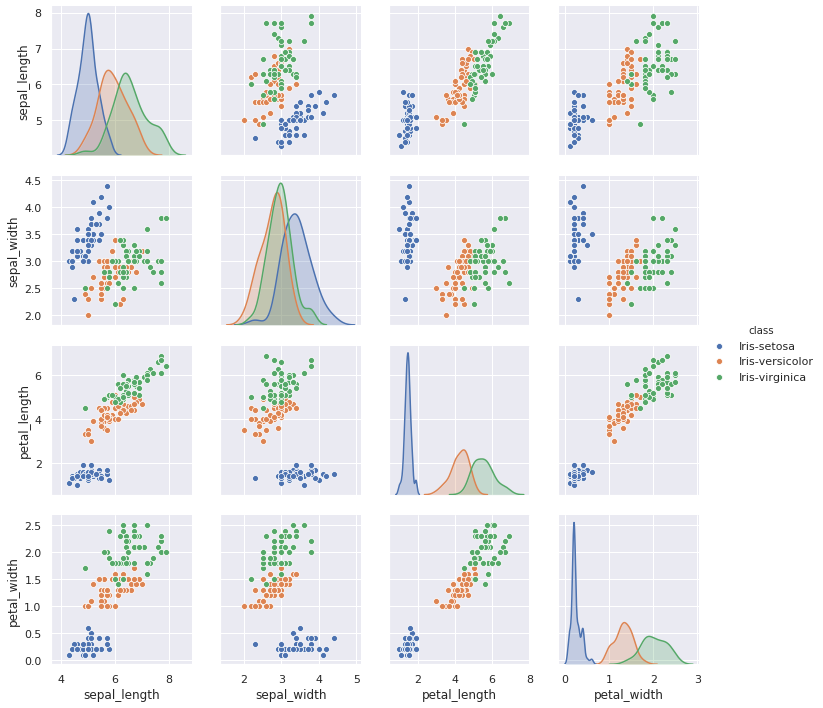

In [26]:
sns.pairplot(iris_data, hue='class', size=2.5)

## Faceted Histograms

Helps to plot histograms of subset of data

In [27]:
tips = sns.load_dataset('tips')

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

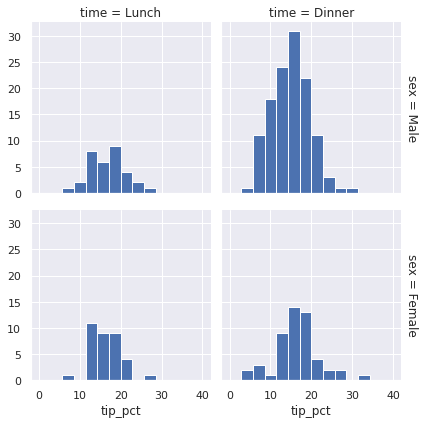

In [34]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor Plot

It allows you to view distribution of a parameter within bins defined by any other parameter

/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


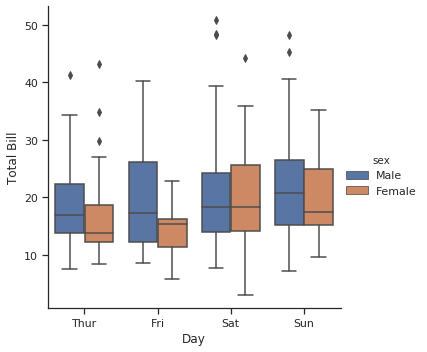

In [36]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint Distributions

Similar to Pair Plot, can be used to show joint distribution between different datasets along with associated marginal distributions

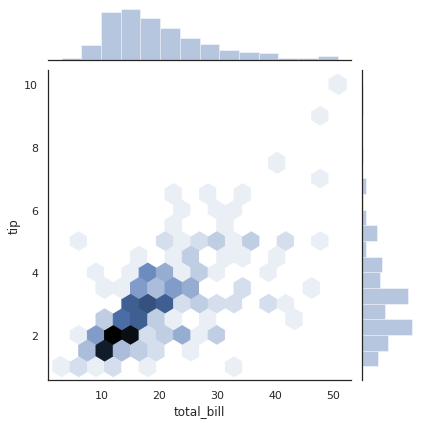

In [37]:
with sns.axes_style("white"):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")

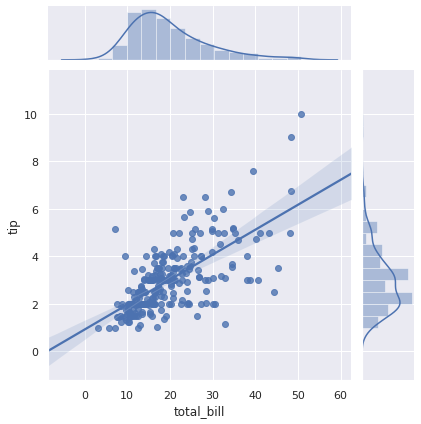

In [38]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## Bar Plots

In [39]:
planets = sns.load_dataset('planets')

In [40]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


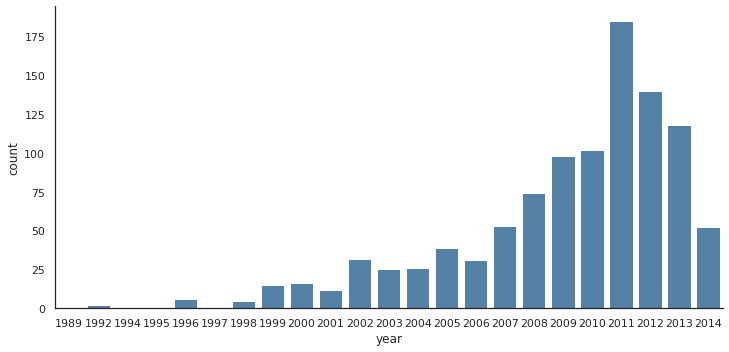

In [41]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color="steelblue")

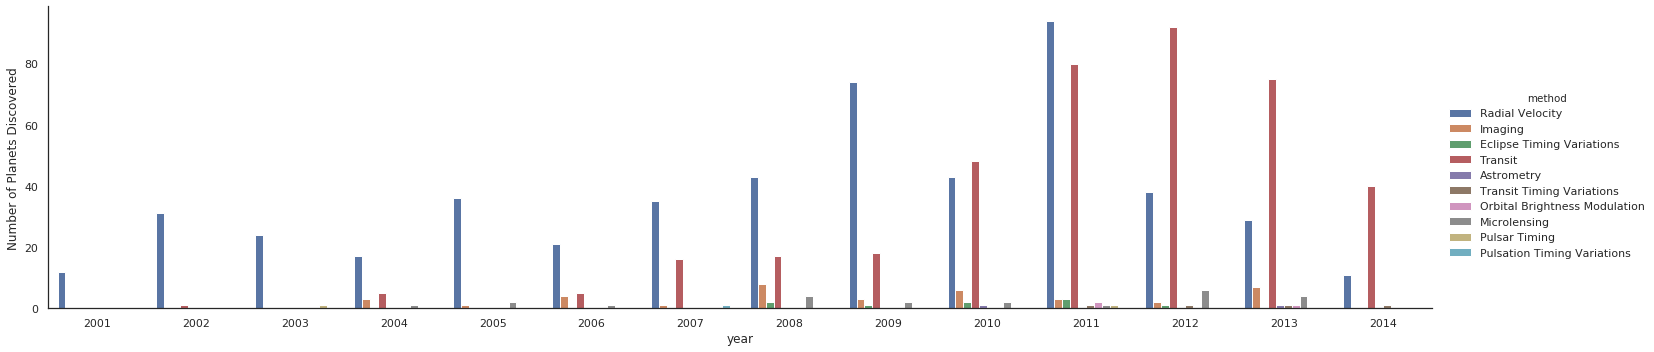

In [42]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

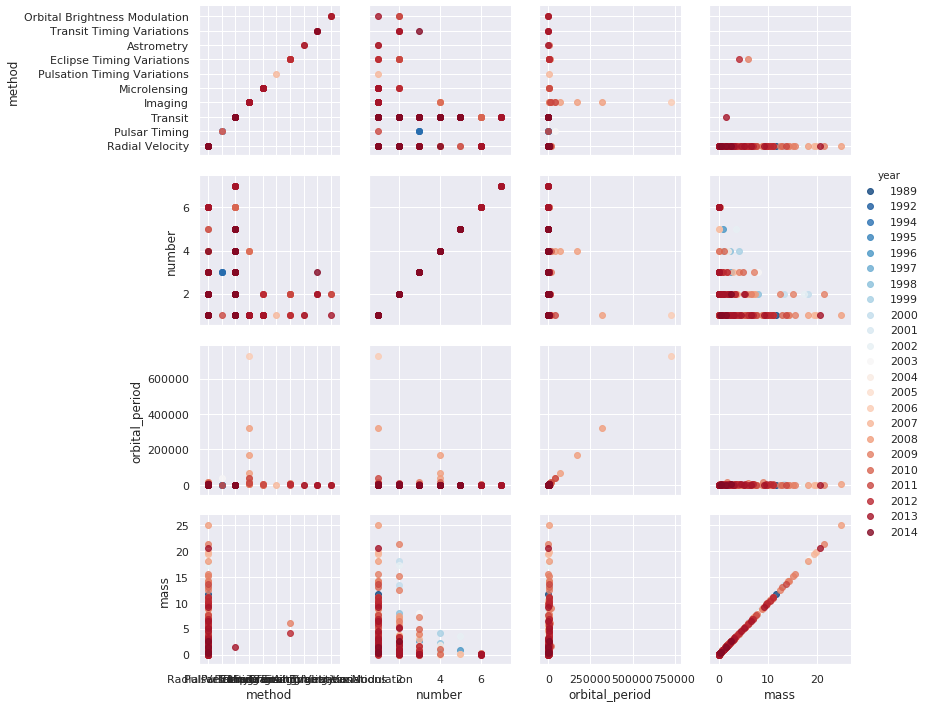

In [45]:
g = sns.PairGrid(planets, vars=['method', 'number', 'orbital_period', 'mass'],
                 hue='year', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## Relative Plot

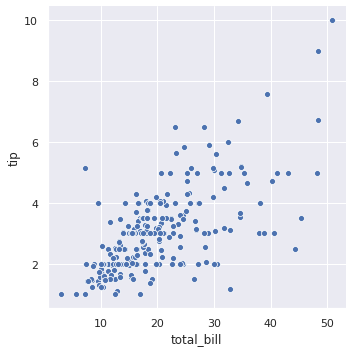

In [47]:
sns.relplot(x="total_bill", y="tip", data=tips);

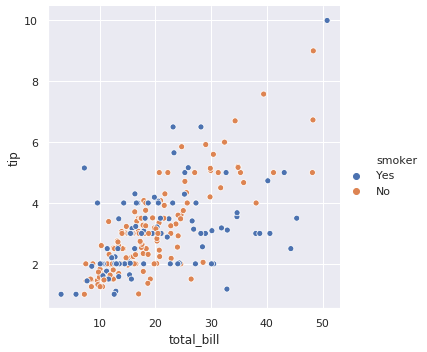

In [48]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

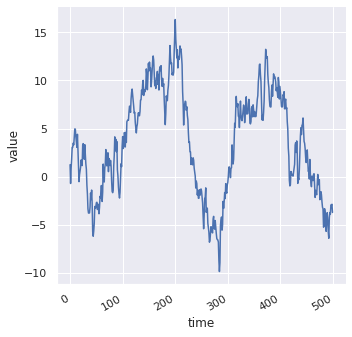

In [49]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()